In [88]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Question 1(Production_of_Agriculture_Stock-Ministry_of_Finance)

In [ ]:
# Import dataset
df1=pd.read_csv("/content/Production_of_Agriculture_Stock-Ministry_of_Finance.csv")
df1


In [ ]:
df1= df1.rename(columns={' 9-2013': 'Sep_2013',' 10-2013':'Oct_2013',' 11-2013':'Nov_2013', ' 12-2013':'Dec_2013' ,' 1-2014':'Jan_2014',' 2-2014':'Feb_2014',' 3-2014':'March_2014',' 4-2014':'Apr_2014',' 5-2014':'May_2014',' 6-2014':'June_2014'})
print(df1)

Default Color and color scale

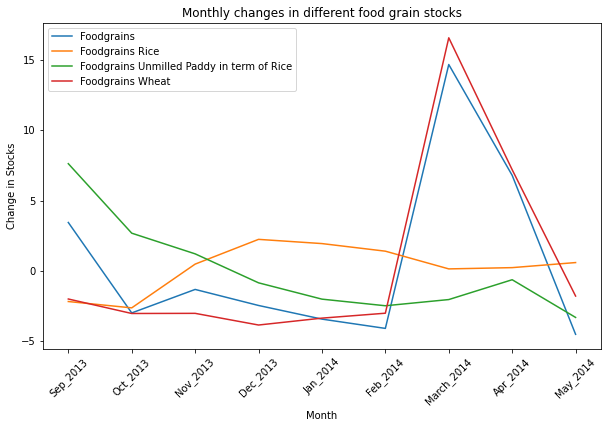

<Figure size 864x576 with 0 Axes>

In [91]:
stock=df1.loc[df1['Particulars'].isin(['Foodgrains','Foodgrains Rice', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat']), :]
stock_group=stock.groupby('Particulars')
stock_changes={}
i=0
list_=list(stock_group.groups.keys())
while i<len(list_):
    name=list_[i]
    group=stock_group.get_group(name)
    monthly_changes=group.iloc[:, 3:].diff(axis=1).iloc[:, 1:]
    stock_changes[name]=monthly_changes
    i+=1
# Set the figure size
plt.figure(figsize=(10, 6))

grain_changes=list(stock_changes.items())
i=0
while i<len(grain_changes):
    grain,changes=grain_changes[i]
    plt.plot(changes.T, label=grain)
    i+=1

# Display plot and label
plt.title('Monthly changes in different food grain stocks')
plt.xlabel('Month')
plt.ylabel('Change in Stocks')
plt.xticks(range(0, 9), stock.columns[3:], rotation=45)
plt.legend()
plt.figure(figsize=(12, 8))
plt.show()

Poster Print, Presentation and Screen Display


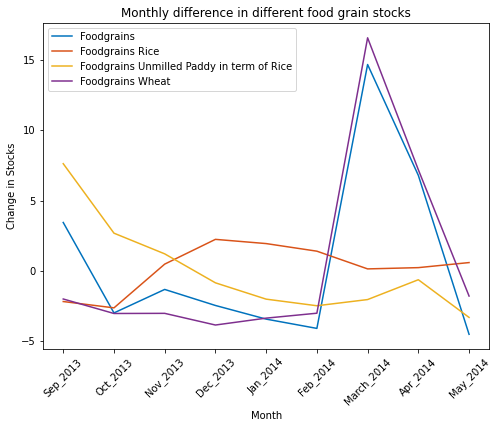

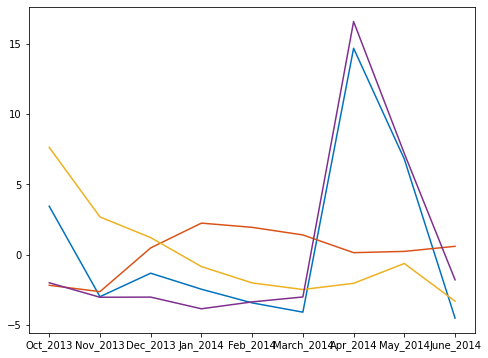

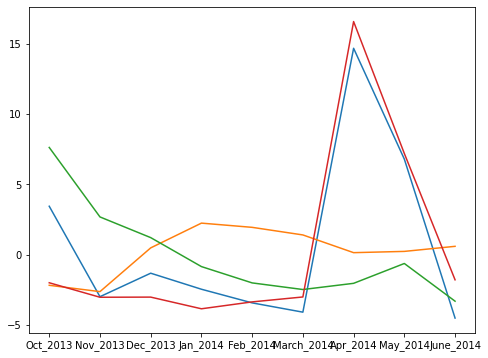

In [102]:
import matplotlib.colors as colors
import matplotlib.cm as cm

# Define color lists
poster_print_colors = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E']
presentation_colors = ['#4C75B1', '#C1541F', '#9BBB58', '#5D5D5D']
screen_display_colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']

# Select data to plot
stock = df1.loc[df1['Particulars'].isin(['Foodgrains','Foodgrains Rice', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat']), :]
stock_group = stock.groupby('Particulars')
stock_difference = {}

poster_print_cmap = colors.LinearSegmentedColormap.from_list('poster_print_cmap', poster_print_colors)
presentation_cmap = colors.LinearSegmentedColormap.from_list('presentation_cmap', presentation_colors)
screen_display_cmap = colors.LinearSegmentedColormap.from_list('screen_display_cmap',screen_display_colors)


i = 0
list_ = list(stock_group.groups.keys())
while i < len(list_):
    name = list_[i]
    group = stock_group.get_group(name)
    monthly_difference = group.iloc[:, 3:].diff(axis=1).iloc[:, 1:]
    stock_difference[name] = monthly_difference
    i += 1

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
grain_difference = list(stock_difference.items())
for i, (grain, difference) in enumerate(stock_difference.items()):
    color = poster_print_colors[i % len(poster_print_colors)]
    ax1.plot(difference.T, label=grain, color=color)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for i, (grain, difference) in enumerate(stock_difference.items()):
    color = poster_print_colors[i % len(presentation_colors)]
    ax2.plot(difference.T, label=grain, color=color)

fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
for i, (grain, difference) in enumerate(stock_difference.items()):
    color = screen_display_colors[i % len(screen_display_colors)]
    ax3.plot(difference.T, label=grain, color=color)

ax1.set_title('Monthly difference in different food grain stocks')
ax1.set_xlabel('Month')
ax1.set_ylabel('Change in Stocks')
ax1.set_xticks(range(0, 9))
ax1.set_xticklabels(stock.columns[3:], rotation=45)
ax1.legend()
plt.show()

ax2.set_title('Monthly difference in different food grain stocks')
ax2.set_xlabel('Month')
ax2.set_ylabel('Change in Stocks')
ax2.set_xticks(range(0, 9))
ax2.set_xticklabels(stock.columns[3:], rotation=45)
ax2.legend()
plt.show()

ax3.set_title('Monthly difference in different food grain stocks')
ax3.set_xlabel('Month')
ax3.set_ylabel('Change in Stocks')
ax3.set_xticks(range(0, 9))
ax3.set_xticklabels(stock.columns[3:], rotation=45)
ax3.legend()
plt.show()

Single Hue scale

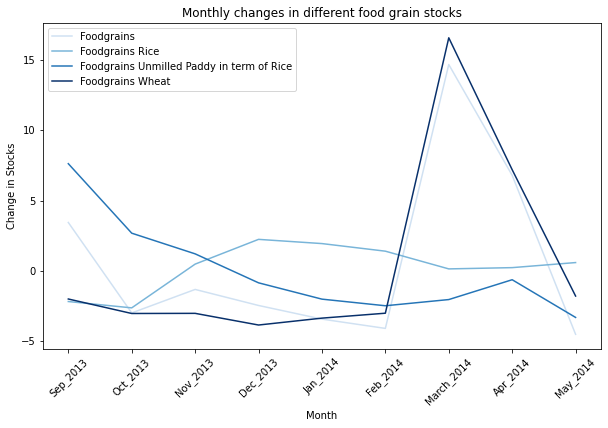

In [93]:
stock=df1.loc[df1['Particulars'].isin(['Foodgrains','Foodgrains Rice', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat']), :]
stock_group=stock.groupby('Particulars')
stock_changes={}
i=0
list_=list(stock_group.groups.keys())
while i<len(list_):
    name=list_[i]
    group=stock_group.get_group(name)
    monthly_changes=group.iloc[:, 3:].diff(axis=1).iloc[:, 1:]
    stock_changes[name]=monthly_changes
    i+=1

grain_list = stock['Particulars'].unique()
# Set the figure size
plt.figure(figsize=(10, 6))

# Single Hue Scale/one color sequential scale
colors = cm.Blues(np.linspace(0.2, 1, len(grain_list)))
for grain, changes in stock_changes.items():
    plt.plot(changes.T, label=grain, color=colors[np.where(grain_list == grain)[0][0]])

# Add chart labels and legend
plt.title('Monthly changes in different food grain stocks')
plt.xlabel('Month')
plt.ylabel('Change in Stocks')
plt.xticks(range(0, 9), stock.columns[3:], rotation=45)
plt.legend()

# Show the chart
plt.show()


Bipolar Scale

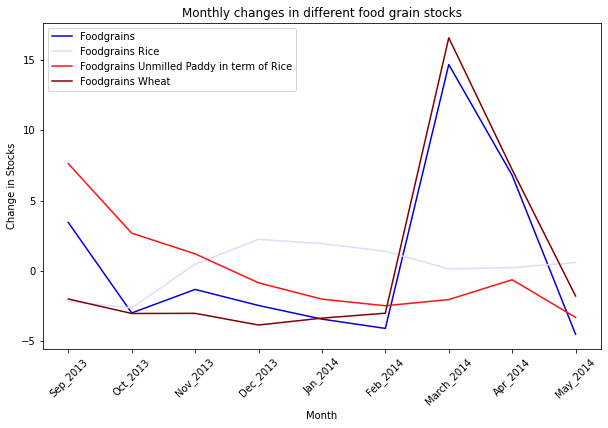

In [94]:
stock=df1.loc[df1['Particulars'].isin(['Foodgrains','Foodgrains Rice', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat']), :]
stock_group=stock.groupby('Particulars')
stock_changes={}
i=0
list_=list(stock_group.groups.keys())
while i<len(list_):
    name=list_[i]
    group=stock_group.get_group(name)
    monthly_changes=group.iloc[:, 3:].diff(axis=1).iloc[:, 1:]
    stock_changes[name]=monthly_changes
    i+=1

grain_list = stock['Particulars'].unique()

# Bipolar color scale from blue to red through gray
colors=cm.seismic(np.linspace(0.2, 1,len(grain_list)))
# Set the figure size
plt.figure(figsize=(10, 6))

# Line Chart
for grain, changes in stock_changes.items():
    plt.plot(changes.T, label=grain, color=colors[np.where(grain_list == grain)[0][0]])

# Add chart labels and legend
plt.title('Monthly changes in different food grain stocks')
plt.xlabel('Month')
plt.ylabel('Change in Stocks')
plt.xticks(range(0, 9), stock.columns[3:], rotation=45)
plt.legend()

# Show the chart
plt.show()


Continuous Scale

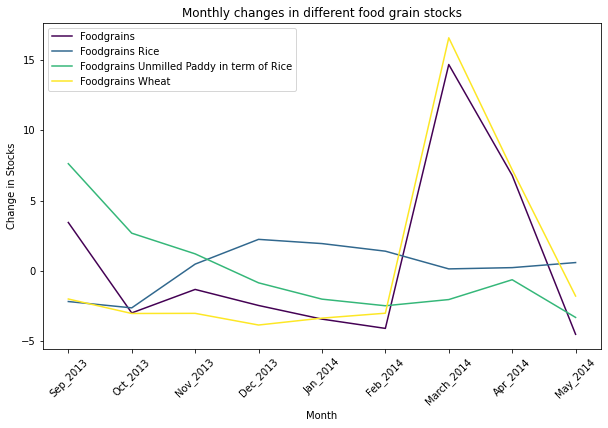

In [95]:
stock=df1.loc[df1['Particulars'].isin(['Foodgrains','Foodgrains Rice', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat']), :]
stock_group=stock.groupby('Particulars')
stock_changes={}
i=0
list_=list(stock_group.groups.keys())
while i<len(list_):
    name=list_[i]
    group=stock_group.get_group(name)
    monthly_changes=group.iloc[:, 3:].diff(axis=1).iloc[:, 1:]
    stock_changes[name]=monthly_changes
    i+=1

colors = cm.viridis(np.linspace(0, 1, len(grain_list)))
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a line chart for each food grain type
for grain, changes in stock_changes.items():
   # plt.figure(figsize=(12,10))
    plt.plot(changes.T, label=grain, color=colors[np.where(grain_list == grain)[0][0]])
   # plt.show()

# Add chart labels and legend
plt.title('Monthly changes in different food grain stocks')
plt.xlabel('Month')
plt.ylabel('Change in Stocks')
plt.xticks(range(0, 9), stock.columns[3:], rotation=45)
plt.legend()

# Show the chart
plt.show()


2nd Question (MergerdAyush_Colleges_in_India_01-04-2021_0.)

In [104]:
# Import dataset
df2=pd.read_csv("/content/MergerdAyush_Colleges_in_India_01-04-2021_0.csv")
df2


,State or Union Territory,Type of System,No. of Colleges - Govt,Admission Capacity - Govt,Permitted Seats - Govt,No. of Colleges - Non-Govt,Admission Capacity - Non-Govt,Permitted Seats - Non-Govt
0,Andhra Pradesh,Ayurveda,1,100,100,2,176,118
1,Assam,Ayurveda,1,93,93,0,0,0
2,Bihar,Ayurveda,2,211,211,6,280,153
3,Chhattisgarh,Ayurveda,2,216,216,4,280,250
4,Delhi,Ayurveda,3,359,359,0,0,0
...,...,...,...,...,...,...,...,...
76,Telangana,Homoeopathy,1,163,163,4,350,350
77,Uttar Pradesh,Homoeopathy,9,1027,1027,4,374,242
78,Uttarakhand,Homoeopathy,0,0,0,2,110,50
79,West Bengal,Homoeopathy,5,459,459,7,395,380


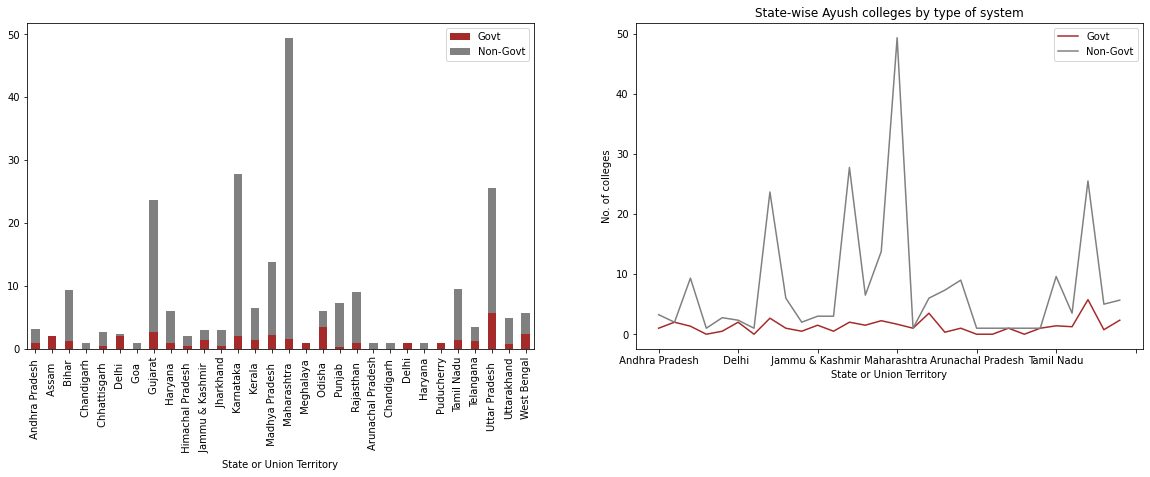

In [105]:
df2 = df2.loc[:, ['State or Union Territory', 'No. of Colleges - Govt', 'No. of Colleges - Non-Govt']]

# Create a pivot table for grouping the require columns
pivot_df = pd.pivot_table(df2, index='State or Union Territory', values=['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'])
pivot_df.columns = ['Govt', 'Non-Govt']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax1,color=['brown', 'grey'])
plt.title("State-wise Ayush colleges by type of system")
plt.xlabel("State or Union Territory")
plt.ylabel("No. of colleges")

pivot_df.plot(kind='line', stacked=True,ax=ax2,color=['brown', 'grey'])
plt.title("State-wise Ayush colleges by type of system")
plt.xlabel("State or Union Territory")
plt.ylabel("No. of colleges")

plt.show()


Screen Display, Presentation and Poster Print


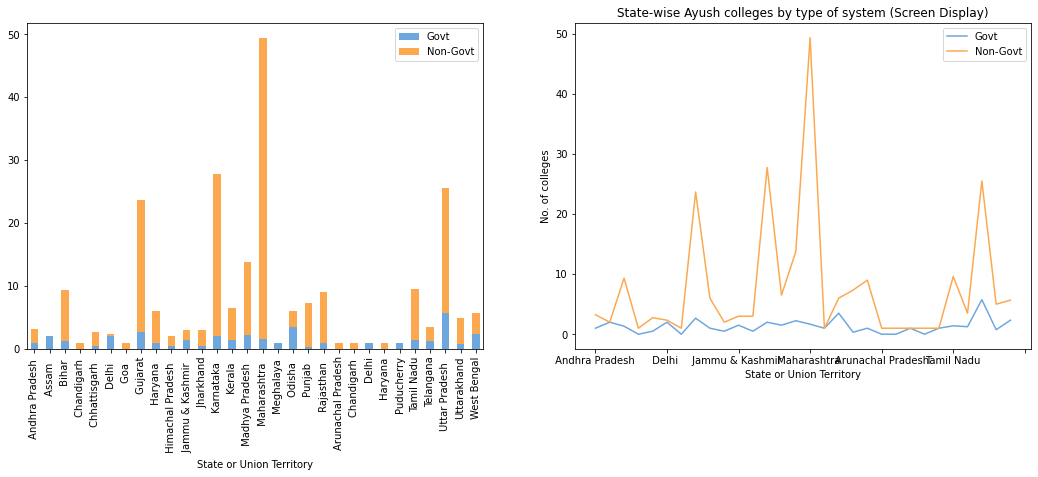

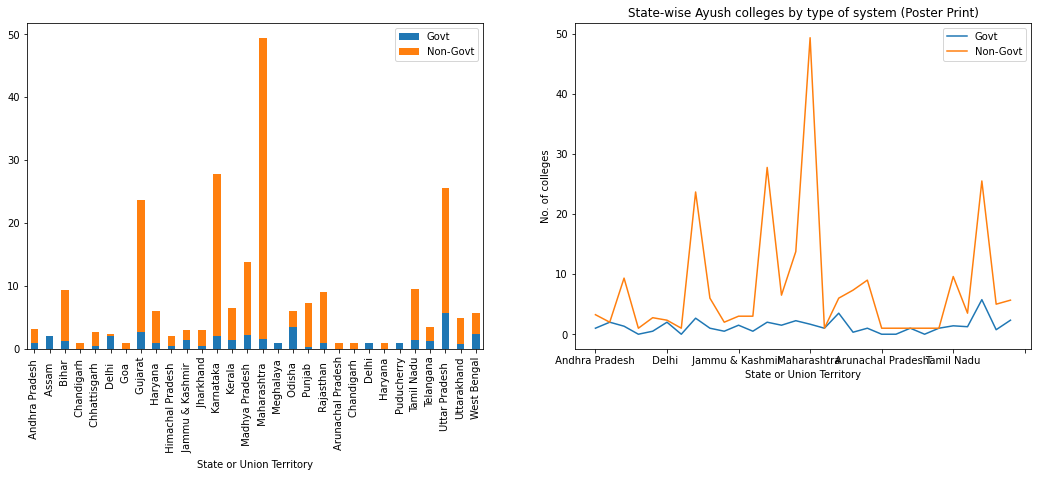

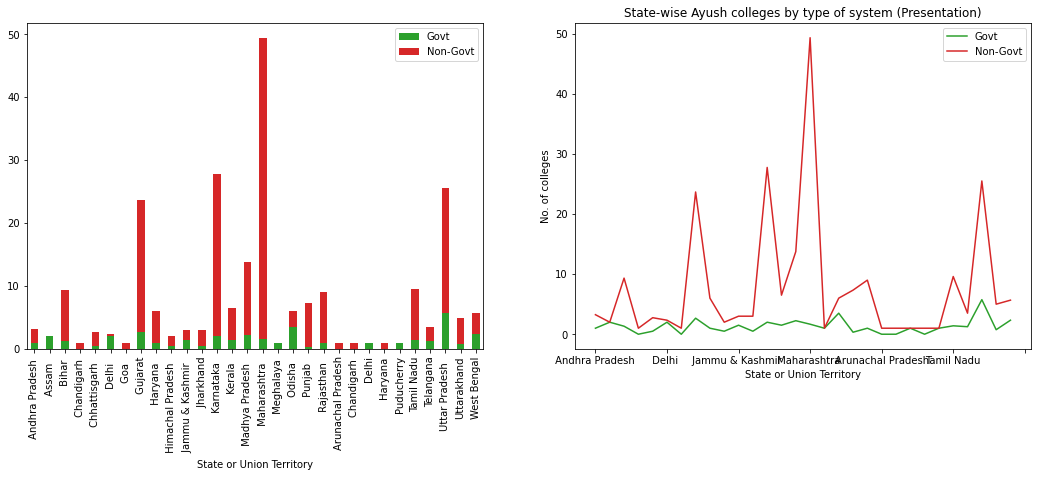

In [106]:
df2 = df2.loc[:, ['State or Union Territory', 'No. of Colleges - Govt', 'No. of Colleges - Non-Govt']]
pivot_df2 = pd.pivot_table(df2, index='State or Union Territory', values=['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'])
pivot_df2.columns=['Govt','Non-Govt']

#Colors for different context
colors={
    'screen': {'Govt': '#6DA7DE', 'Non-Govt': '#FCA84F'},
    'poster': {'Govt': '#1F77B4', 'Non-Govt': '#FF7F0E'},
    'presentation': {'Govt': '#2CA02C', 'Non-Govt': '#D62728'}
}
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
context='screen'
color_map=colors[context]
pivot_df2.plot(kind='bar',stacked=True,color=color_map, ax=ax1)
pivot_df2.plot(kind='line',stacked=True,color=color_map, ax=ax2)
plt.title("State-wise Ayush colleges by type of system (Screen Display)")
plt.xlabel("State or Union Territory")
plt.ylabel("No. of colleges")


fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
context='poster'
color_map=colors[context]
pivot_df2.plot(kind='bar',stacked=True,color=color_map,ax=ax3)
pivot_df2.plot(kind='line',stacked=True,color=color_map,ax=ax4)
plt.title("State-wise Ayush colleges by type of system (Poster Print)")
plt.xlabel("State or Union Territory")
plt.ylabel("No. of colleges")

context='presentation'
color_map=colors[context]
fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
pivot_df2.plot(kind='bar',stacked=True,color=color_map,ax=ax5)
pivot_df2.plot(kind='line',stacked=True,color=color_map,ax=ax6)
plt.title("State-wise Ayush colleges by type of system (Presentation)")
plt.xlabel("State or Union Territory")
plt.ylabel("No. of colleges")

# Show the chart
plt.show()


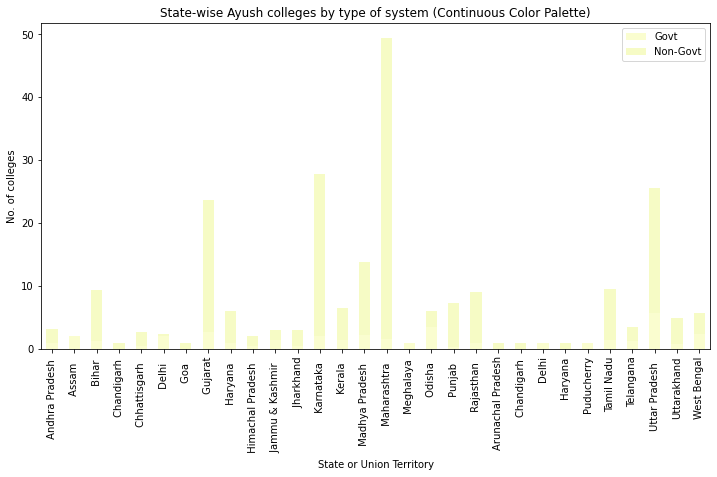

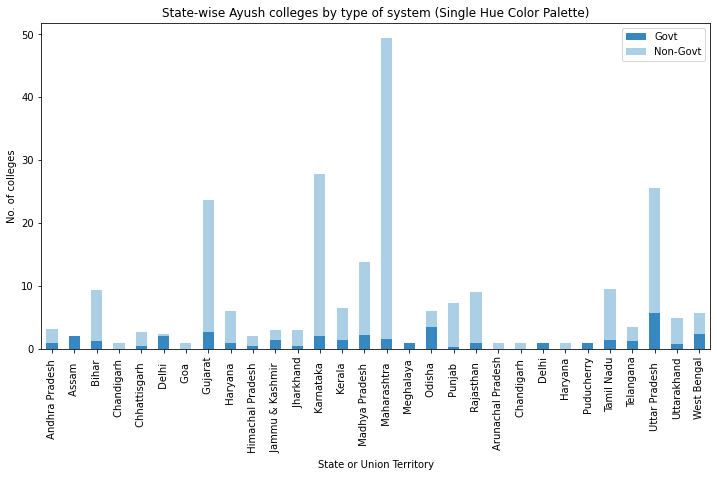

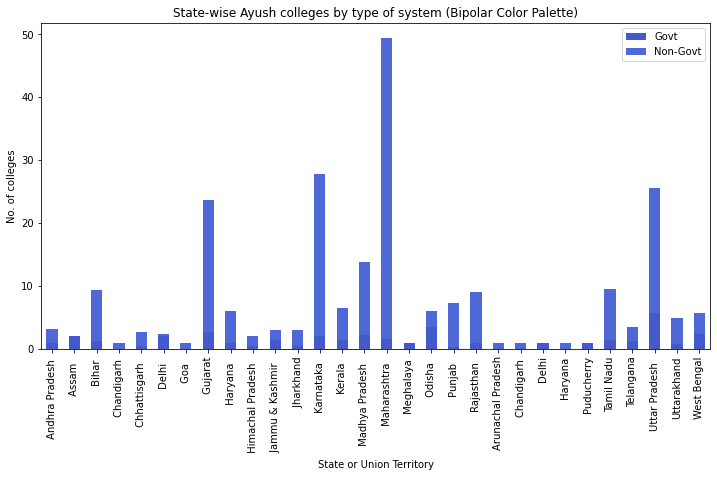

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only the desired columns
df2 = df2.loc[:, ['State or Union Territory', 'No. of Colleges - Govt', 'No. of Colleges - Non-Govt']]

# Create a pivot table for grouping the required columns
pivot_df2 = pd.pivot_table(df2, index='State or Union Territory', values=['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'])
pivot_df2.columns = ['Govt', 'Non-Govt']

# Create a continuous color palette
palette1 = sns.color_palette("YlGnBu", len(pivot_df2))

# Create a single hue color palette
palette2 = sns.color_palette("Blues_r", 2)

# Create a bipolar color palette
palette3 = sns.color_palette("coolwarm", len(pivot_df2))

# Create the first plot with the continuous color palette
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df2.plot(kind='bar', stacked=True, ax=ax, color=palette1)
ax.set_title("State-wise Ayush colleges by type of system (Continuous Color Palette)")
ax.set_xlabel("State or Union Territory")
ax.set_ylabel("No. of colleges")

# Create the second plot with the single hue color palette
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df2.plot(kind='bar', stacked=True, ax=ax, color=palette2)
ax.set_title("State-wise Ayush colleges by type of system (Single Hue Color Palette)")
ax.set_xlabel("State or Union Territory")
ax.set_ylabel("No. of colleges")

# Create the third plot with the bipolar color palette
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df2.plot(kind='bar', stacked=True, ax=ax, color=palette3)
ax.set_title("State-wise Ayush colleges by type of system (Bipolar Color Palette)")
ax.set_xlabel("State or Union Territory")
ax.set_ylabel("No. of colleges")

plt.show()


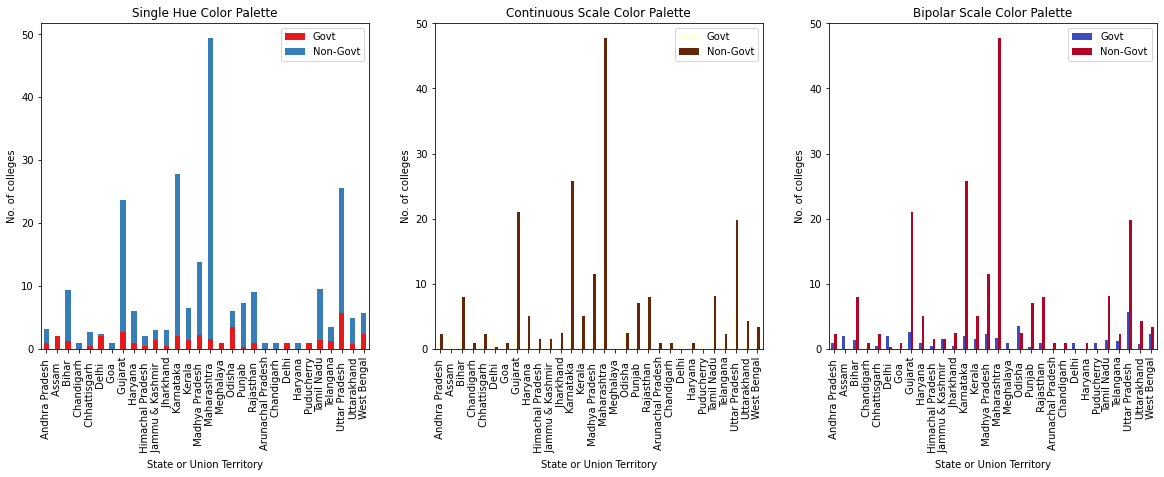

In [109]:
df2 = df2.loc[:, ['State or Union Territory', 'No. of Colleges - Govt', 'No. of Colleges - Non-Govt']]
pivot_df = pd.pivot_table(df2, index='State or Union Territory', values=['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'])
pivot_df.columns = ['Govt', 'Non-Govt']

# single hue color palette
single_hue_palette = sns.color_palette('Set1', n_colors=2)

# continuous scale color palette
continuous_scale_palette = sns.color_palette('YlOrBr', as_cmap=True)

# bipolar scale color palette
bipolar_scale_palette = sns.color_palette('coolwarm', as_cmap=True)

# Create the plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Single hue color palette
pivot_df.plot(kind='bar', stacked=True, ax=ax1, color=single_hue_palette)
ax1.set_title('Single Hue Color Palette')
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('No. of colleges')

# Continuous scale color palette
colors = continuous_scale_palette(np.linspace(0, 1, len(pivot_df.columns)))
pivot_df.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Continuous Scale Color Palette')
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('No. of colleges')

# Bipolar scale color palette
colors = bipolar_scale_palette(np.linspace(0, 1, len(pivot_df.columns)))
pivot_df.plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('Bipolar Scale Color Palette')
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('No. of colleges')

plt.show()


Question 3 (Road_Transport_BRS_2017-18_Annexure7_9c)

In [ ]:
# Import dataset
df3=pd.read_csv("/content/Road_Transport_BRS_2017-18_Annexure7_9c.csv")
df3


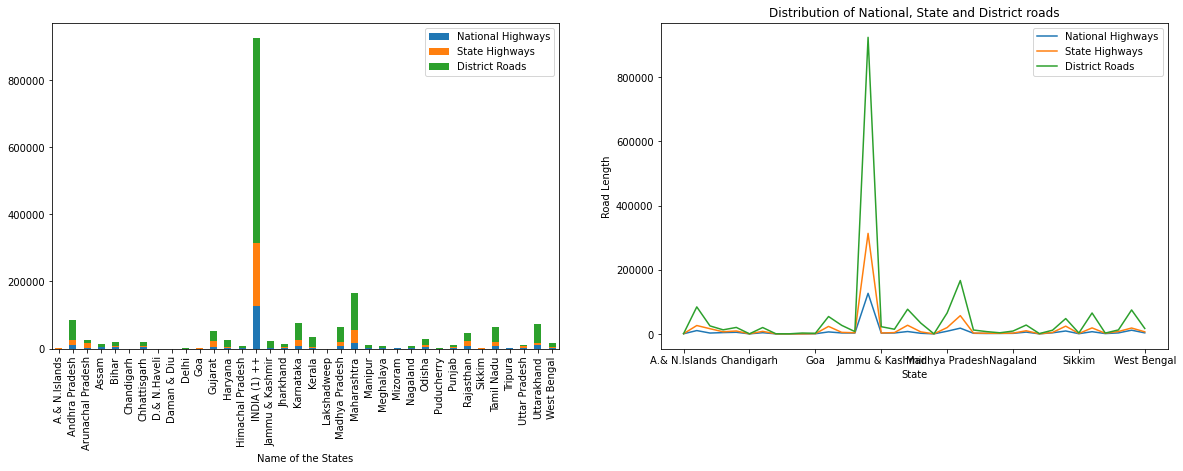

In [111]:

grouped_df3 = df3.groupby('Name of the States')[['National Highways', 'State Highways', 'District Roads']].sum()


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

grouped_df3.plot(kind='bar', stacked=True,ax=ax1)
grouped_df3.plot(kind='line', stacked=True,ax=ax2)
plt.title('Distribution of National, State and District roads')
plt.xlabel('State')
plt.ylabel('Road Length')

plt.show()


Screen Display, Presentation and Poster Print

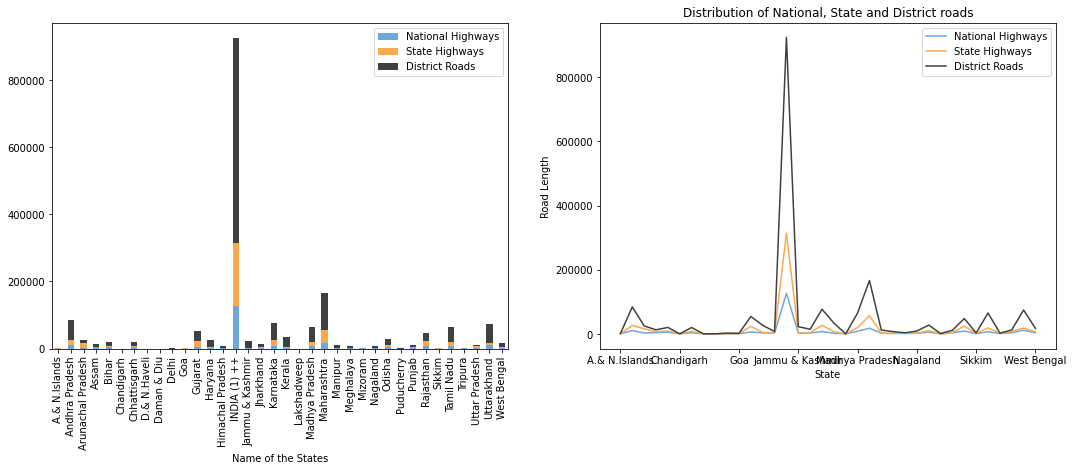

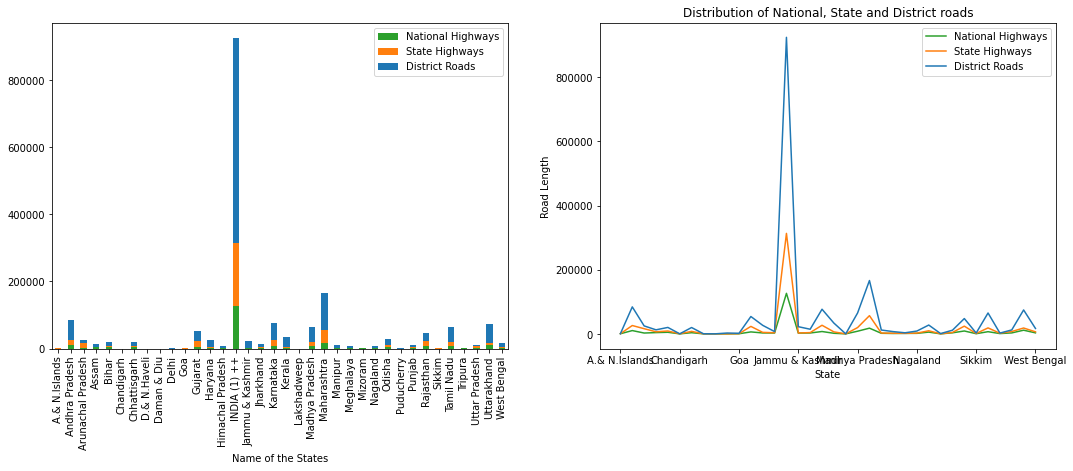

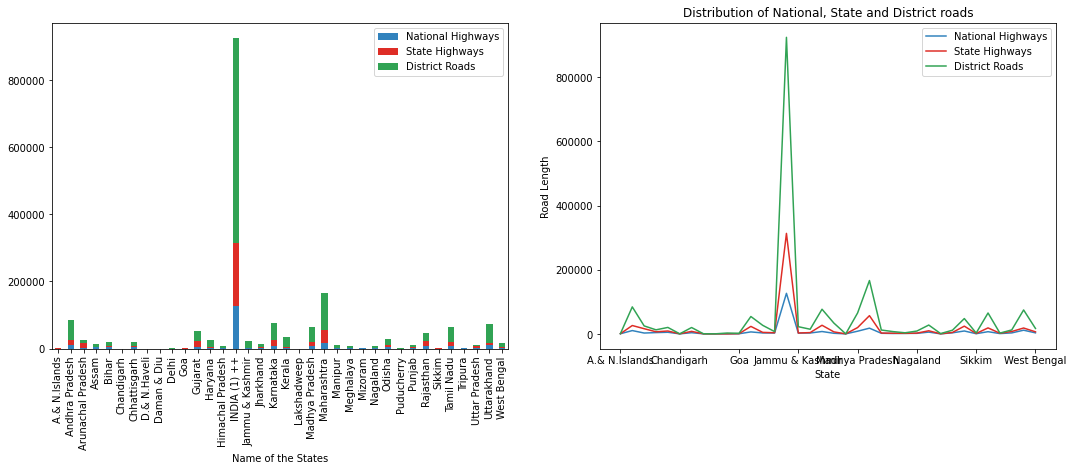

In [112]:

grouped_df3 = df3.groupby('Name of the States')[['National Highways', 'State Highways', 'District Roads']].sum()

colors = {
    'screen': {'National Highways': '#6DA7DE', 'State Highways': '#FCA84F', 'District Roads': '#404040'},
    'presentation': {'National Highways': '#2CA02C', 'State Highways': '#FF7F0E', 'District Roads': '#1F77B4'},
    'poster': {'National Highways': '#3182bd', 'State Highways': '#de2d26', 'District Roads': '#31a354'}
}
context = 'screen'
color_map = colors[context]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
grouped_df3.plot(kind='bar', stacked=True,ax=ax1,color=[color_map[col] for col in grouped_df3.columns])
grouped_df3.plot(kind='line', stacked=True,ax=ax2,color=[color_map[col] for col in grouped_df3.columns])
plt.title('Distribution of National, State and District roads')
plt.xlabel('State')
plt.ylabel('Road Length')
plt.show()

context = 'presentation'
color_map = colors[context]
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
grouped_df3.plot(kind='bar', stacked=True,ax=ax3,color=[color_map[col] for col in grouped_df3.columns])
grouped_df3.plot(kind='line', stacked=True,ax=ax4,color=[color_map[col] for col in grouped_df3.columns])
plt.title('Distribution of National, State and District roads')
plt.xlabel('State')
plt.ylabel('Road Length')
plt.show()

context = 'poster'
color_map = colors[context]
fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
grouped_df3.plot(kind='bar', stacked=True,ax=ax5,color=[color_map[col] for col in grouped_df3.columns])
grouped_df3.plot(kind='line', stacked=True,ax=ax6,color=[color_map[col] for col in grouped_df3.columns])
plt.title('Distribution of National, State and District roads')
plt.xlabel('State')
plt.ylabel('Road Length')
plt.show()


Single Hue Scale, Continuous Scale and Bipolar scale

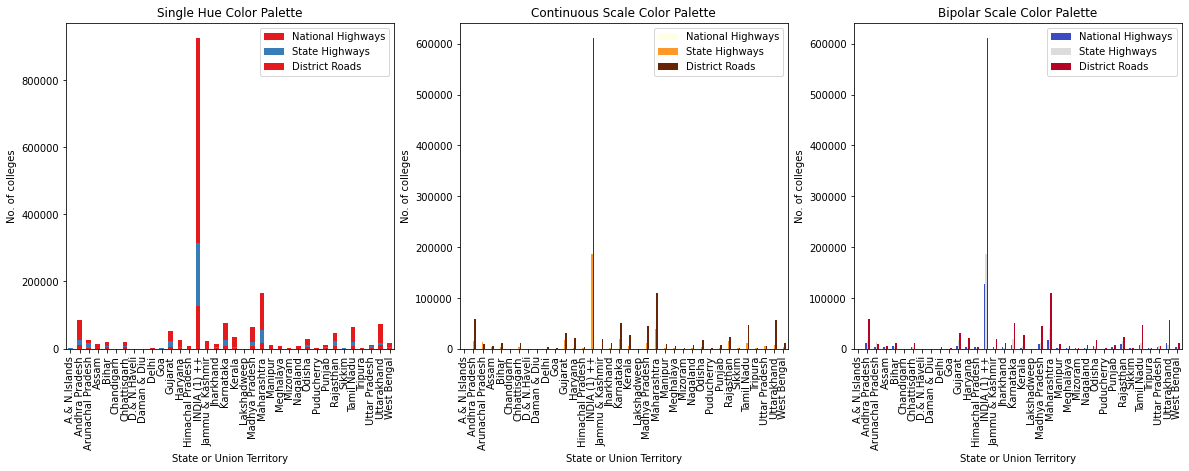

In [115]:
# single hue ,continuous , biopolar color palette
single_hue_palette = sns.color_palette('Set1', n_colors=2)
continuous_scale_palette = sns.color_palette('YlOrBr', as_cmap=True)
bipolar_scale_palette = sns.color_palette('coolwarm', as_cmap=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Single hue color palette
grouped_df3.plot(kind='bar', stacked=True, ax=ax1, color=single_hue_palette)
ax1.set_title('Single Hue Color Palette')
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('No. of colleges')

# Continuous scale color palette
colors = continuous_scale_palette(np.linspace(0, 1, len(grouped_df3.columns)))
grouped_df3.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Continuous Scale Color Palette')
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('No. of colleges')

# Bipolar scale color palette
colors = bipolar_scale_palette(np.linspace(0, 1, len(grouped_df3.columns)))
grouped_df3.plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('Bipolar Scale Color Palette')
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('No. of colleges')

plt.show()


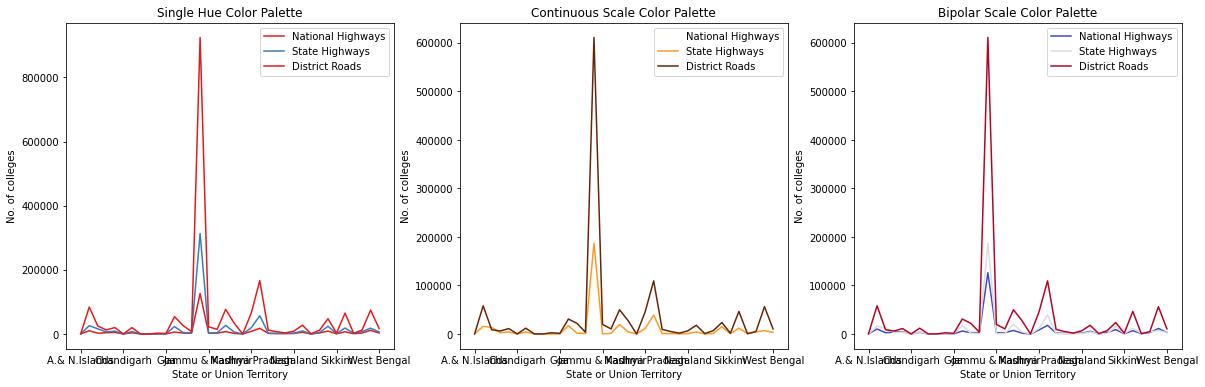

In [114]:
# single hue ,continuous , biopolar color palette
single_hue_palette = sns.color_palette('Set1', n_colors=2)
continuous_scale_palette = sns.color_palette('YlOrBr', as_cmap=True)
bipolar_scale_palette = sns.color_palette('coolwarm', as_cmap=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Single hue color palette
grouped_df3.plot(kind='line', stacked=True, ax=ax1, color=single_hue_palette)
ax1.set_title('Single Hue Color Palette')
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('No. of colleges')

# Continuous scale color palette
colors = continuous_scale_palette(np.linspace(0, 1, len(grouped_df3.columns)))
grouped_df3.plot(kind='line', ax=ax2, color=colors)
ax2.set_title('Continuous Scale Color Palette')
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('No. of colleges')

# Bipolar scale color palette
colors = bipolar_scale_palette(np.linspace(0, 1, len(grouped_df3.columns)))
grouped_df3.plot(kind='line', ax=ax3, color=colors)
ax3.set_title('Bipolar Scale Color Palette')
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('No. of colleges')

plt.show()
